In [1]:
from __future__ import print_function
import torch
from torchvision import datasets, transforms
import numpy as np
from WeakLearners import WongNeuralNetCIFAR10
from WeakLearners2 import WongNeuralNetCIFAR102
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [2]:
# !git clone https://github.com/NVIDIA/apex
# !cd apex
# !pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./

In [3]:
!pip install pytorch_memlab

You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
from Boosting import Ensemble, runBoosting
from AdversarialAttacks import attack_fgsm, attack_pgd
from pytorch_memlab import LineProfiler

In [5]:
import utils

In [6]:
cuda = torch.device('cuda:0')

In [7]:
%load_ext autoreload
%autoreload 2

## CIFAR10 Boosting (Adversarial)

In [8]:
# maxSamples_vals = [100000, 200000, 500000]
maxSamples_vals = [750007]
# maxSamples_vals = [30003]
# maxSamples_vals = [500000, 1000000]
# done for 50K, 100K
# maxSamples_vals = [1000000, 2000000]
# maxSamples_vals = [123456]
batch_size=100
# maxSamples_vals = [batch_size + 1]

In [9]:
num_wl = 6 # maybe around 100? #later: maybe change this to an array?
num_epochs = 1

In [10]:
ensembles = []
# epsilons = [0.0, 0.01, 0.02, 0.03, 0.05, 0.1]
epsilons = [0.127]
train_eps_nn = 8
# epsilons = []
# epsilons = [0.0, 0.01]

In [11]:
from Testing import testEnsemble
path = f'./models/{maxSamples_vals[0]}Eps{train_eps_nn}/'
attack=attack_pgd
attackStr="attack_pgd"
ensemble = testEnsemble(path, [attack], num_wl, numsamples_train=200, numsamples_val=1500, attack_eps_ensemble=epsilons, gradOptWeights=True) 

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Weak Learner  0 .  Time Elapsed (s):  0
{'val': 0.75, <function attack_pgd at 0x7fe9561a37b8>: [0.32]}
{'val': 0.8, <function attack_pgd at 0x7fe9561a37b8>: [0.49]}
{'val': 0.81, <function attack_pgd at 0x7fe9561a37b8>: [0.57]}
{'val': 0.86, <function attack_pgd at 0x7fe9561a37b8>: [0.51]}
{'val': 0.82, <function attack_pgd at 0x7fe9561a37b8>: [0.43]}
{'val': 0.85, <function attack_pgd at 0x7fe9561a37b8>: [0.45]}
{'val': 0.81, <function attack_pgd at 0x7fe9561a37b8>: [0.46]}
{'val': 0.82, <function attack_pgd at 0x7fe9561a37b8>: [0.48]}
{'val': 0.84, <function attack_pgd at 0x7fe9561a37b8>: [0.55]}
{'val': 0.76, <function attack_pgd at 0x7fe9561a37b8>: [0.41]}
{'val': 0.83, <function attack_pgd at 0x7fe9561a37b8>: [0.48]}
{'val': 0.74, <function attack_pgd at 0x7fe9561a37b8>: [0.43]}
{'val': 0.84, <function attack_pgd at 0x7fe9561a37b8>: [0.44]}
{'val': 0.78, <function atta

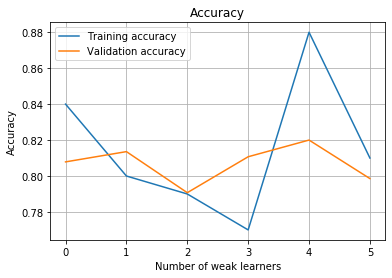

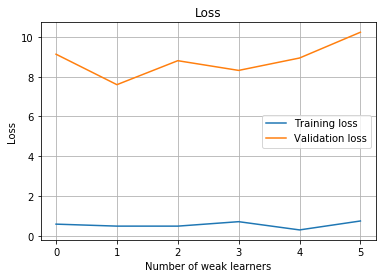

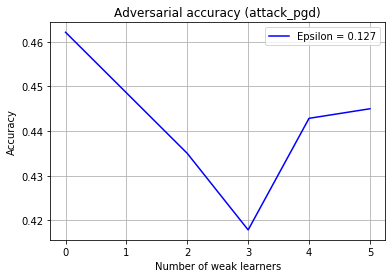

In [12]:
maxSamples = maxSamples_vals[0]
resultsPath = f'results/plots/cifar10/train_eps_{train_eps_nn}/{attackStr}/'
acc_file = resultsPath + f'acc_maxSamples_{maxSamples}.png'
adv_acc_file = resultsPath + f'adv_acc_maxSamples_{maxSamples}.png'
loss_file = resultsPath + f'loss_maxSamples_{maxSamples}.png'
# wl_train_acc_file = resultsPath + f'wl_train_acc_maxSamples_{maxSamples}.png'
ensemble.plot_accuracies(acc_file)
ensemble.plot_loss(loss_file)
ensemble.plot_adversarial_accuracies(adv_acc_file)
# ensemble.plot_wl_acc(wl_train_acc_file)


In [11]:
# from Boosting import SchapireWongMulticlassBoosting
from AdversarialAttacks import attack_fgsm, attack_pgd
import gc
# Ensemble.record_accuracies, Ensemble.calc_accuracies, attack_fgsm, Ensemble.schapireContinuousPredict
for i in range(len(maxSamples_vals)):
    print("len(maxSamples_vals):", len(maxSamples_vals))
    maxSamples = maxSamples_vals[i]
    print("maxSamples:", maxSamples)
    ensemble = runBoosting(num_wl, maxSamples, dataset=datasets.CIFAR10, weakLearnerType = WongNeuralNetCIFAR102, val_attacks = [], 
                               attack_eps_nn=epsilons, attack_eps_ensemble=epsilons, train_eps_nn=train_eps_nn, adv_train_prefix=num_wl, batch_size=batch_size, val_flag=False)
    print("number of wl in ensemble:", len(ensemble.weakLearners))
    ensembles.append(ensemble)
    gc.collect()
#     for obj in gc.get_objects():
#         try:
#             if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
#                 print(type(obj), obj.size())
#         except:
#             pass
    
#     path_head = f'results/plots/cifar10/train_eps_{train_eps_nn}/'
#     try:
#         os.mkdir(path_head)
#     except OSError:
#         pass
#     acc_file = path_head + f'acc_maxSamples_{maxSamples}.png'
#     adv_acc_file = path_head + f'adv_acc_maxSamples_{maxSamples}.png'
#     loss_file = path_head + f'loss_maxSamples_{maxSamples}.png'
#     wl_train_acc_file = path_head + f'wl_train_acc_maxSamples_{maxSamples}.png'
#     ensemble.plot_accuracies(acc_file)
#     ensemble.plot_loss(loss_file)
#     ensemble.plot_adversarial_accuracies(adv_acc_file)
#     ensemble.plot_wl_acc(wl_train_acc_file)
#0.3445499534706232, 0.35256058576867955, 0.3492509840145725

len(maxSamples_vals): 1
maxSamples: 750007
attack_eps_nn:  [0.127]
attack_eps_ensemble:  [0.127]
train_eps_nn:  8
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
attack eps ens [0.127]
path_head: ./models/750007Eps8/
----------------------------------------------------------------------------------------------------
Training weak learner 0
C_t:  [[ 1.  1.  1.  1.  1.  1. -9.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1. -9.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1. -9.]
 [ 1.  1.  1.  1. -9.  1.  1.  1.  1.  1.]
 [ 1. -9.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1. -9.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1. -9.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1. -9.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1. -9.  1.]
 [ 1.  1.  1. -9.  1.  1.  1.  1.  1.  1.]]
targets:  tensor([6, 9, 9, 4, 1, 1, 2, 7, 8, 3])
f:  [[0. 0. 0. 0. 0. 0. 0. 0. 

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/cifar.py:118: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  img, target = self.data[index], self.targets[index]


Progress: 10000,  val accuracy: 0.1900
PGD accuracy: []
Progress: 20000,  val accuracy: 0.3500
PGD accuracy: []
Progress: 30000,  val accuracy: 0.3300
PGD accuracy: []
Progress: 40000,  val accuracy: 0.3700
PGD accuracy: []
Progress: 50000,  val accuracy: 0.3700
PGD accuracy: []
train_loader: <torch.utils.data.dataloader.DataLoader object at 0x7fedcda2f400>
Progress: 60000,  val accuracy: 0.3600
PGD accuracy: []
Progress: 70000,  val accuracy: 0.4200
PGD accuracy: []
Progress: 80000,  val accuracy: 0.4500
PGD accuracy: []
Progress: 90000,  val accuracy: 0.4200
PGD accuracy: []
Progress: 100000,  val accuracy: 0.4700
PGD accuracy: []
train_loader: <torch.utils.data.dataloader.DataLoader object at 0x7fedcda2f400>
Progress: 110000,  val accuracy: 0.4700
PGD accuracy: []
Progress: 120000,  val accuracy: 0.4200
PGD accuracy: []
Progress: 130000,  val accuracy: 0.4800
PGD accuracy: []
Progress: 140000,  val accuracy: 0.5100
PGD accuracy: []
Progress: 150000,  val accuracy: 0.5400
PGD accurac

## Sanity Checking PGD Attack

In [10]:
TestNN = WongNeuralNetCIFAR10(attack_eps=[0.127])

In [11]:
# TestNN.model.load_state_dict(torch.load("./models/750005Eps8/wl_0.pth"))
TestNN.model.load_state_dict(torch.load("./models/wongBaseline15E.pth"))
TestNN.model.cuda()
TestNN.model.eval()
print("")

In [12]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2471, 0.2435, 0.2616)),
])

# Normalize the test set same as training set without augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2471, 0.2435, 0.2616)),
])

trainset = datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=100, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(
    testset, batch_size=1000, shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


### Check a single WL

In [13]:
i = 0
accs = []
for data in test_loader:
    X = data[0]
    y = data[1]
    losses, acc = TestNN.calc_accuracies(X.cuda(), y.cuda(), val_attacks=[attack_pgd], attack_iters=20)
    print(acc[attack_pgd][0])
    accs.append(acc[attack_pgd][0])
    
    if i>20:
        break
    i+=1
print("Overall acc: ", sum(accs)/len(accs))

0.455
0.44
0.443
0.44
0.447
0.428
0.418
0.453
0.459
0.471
Overall acc:  0.44539999999999996


## Sanity check for PGD (single weak learner and ensemble)

In [23]:
pgd_steps = [20, 40, 60, 80, 100]
# pgd_steps = [20]
attack_eps = [0.03]
num_wl = 1
from Testing import testEnsemble

In [24]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2471, 0.2435, 0.2616)),
])

# Normalize the test set same as training set without augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2471, 0.2435, 0.2616)),
])

trainset = datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=100, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(
    testset, batch_size=1000, shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [19]:
#Test pgd on weak learners
wl_accuracies = []
for attack_iters in pgd_steps:
    TestNN = WongNeuralNetCIFAR10(attack_eps=attack_eps)
    TestNN.model.load_state_dict(torch.load("./models/750000Eps8/wl_0.pth"))
    TestNN.model.cuda()
    TestNN.model.eval()
    print("")
    
    i = 0
#     accs = []
    for data in test_loader:
        X = data[0]
        y = data[1]
        losses, acc = TestNN.calc_accuracies(X.cuda(), y.cuda(), val_attacks=[attack_pgd], attack_iters=attack_iters)
        print(acc)
        wl_accuracies.append(acc[attack_pgd])

    #     if i>5:
        break
        i+=1
print("pgd_steps:", pgd_steps)
print("wl_accuracies:", wl_accuracies)
plt.subplots()
plt.plot(pgd_steps, wl_accuracies)
plt.xlabel('PGD iterations')
plt.ylabel('Accuracy')
plt.title('Weak learner accuracy vs PGD iterations')
plt.show()

RuntimeError: CUDA out of memory. Tried to allocate 126.00 MiB (GPU 0; 15.90 GiB total capacity; 14.80 GiB already allocated; 9.50 MiB free; 15.23 GiB reserved in total by PyTorch)

In [18]:
# Test pgd on ensemble (1 wl)
for attack_iters in pgd_steps:
    ensemble = Ensemble(weakLearners=[], weakLearnerWeights=[], weakLearnerType=WongNeuralNetCIFAR10, attack_eps=[0.03])
    ensemble.losses["val"]
    for i in range(1):
        ensemble.addWeakLearner("./models/750000Eps8/wl_0.pth", 1)
#         print("before ens acc", ensemble.accuracies)

        ensemble.record_accuracies(i, train_loader, test_loader, 1000, 1000, val_attacks=[attack_pgd], attack_iters=attack_iters)
        print("ensemble accuracies:", ensemble.accuracies)

KeyError: 'val'

In [16]:
accuracies = []

In [25]:
# test pgd on ensemble (more wl)
num_wl = 15
train_eps_nn = 8
for attack_iters in pgd_steps:
    path = f'./models/{maxSamples_vals[0]}Eps{train_eps_nn}/'
    attack=attack_pgd
    attackStr="attack_pgd"
    ensemble = testEnsemble(path, [attack], num_wl, numsamples_train=400, numsamples_val=400, attack_eps_ensemble=epsilons, attack_iters=attack_iters)
    accuracies.append(ensemble.accuracies[attackStr])
    print("cur acc:", accuracies[-1])
    
    
#     maxSamples = maxSamples_vals[0]
#     resultsPath = f'results/plots/cifar10/train_eps_{train_eps_nn}_iter_{attack_iters}/{attackStr}/'
#     acc_file = resultsPath + f'acc_maxSamples_{maxSamples}.png'
#     adv_acc_file = resultsPath + f'adv_acc_maxSamples_{maxSamples}.png'
#     loss_file = resultsPath + f'loss_maxSamples_{maxSamples}.png'
#     # wl_train_acc_file = resultsPath + f'wl_train_acc_maxSamples_{maxSamples}.png'
#     ensemble.plot_accuracies(acc_file)
#     ensemble.plot_loss(loss_file)
#     ensemble.plot_adversarial_accuracies(adv_acc_file)
    # ensemble.plot_wl_acc(wl_train_acc_file)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Weak Learner  0 .  Time Elapsed (s):  0
Weak Learner  1 .  Time Elapsed (s):  0
Weak Learner  2 .  Time Elapsed (s):  0
Weak Learner  3 .  Time Elapsed (s):  0
pgd called with 0.127 0.01 20 1
{'val': 0.71, <function attack_pgd at 0x7f20b4390400>: [0.39]}
pgd called with 0.127 0.01 20 1
{'val': 0.73, <function attack_pgd at 0x7f20b4390400>: [0.41]}
pgd called with 0.127 0.01 20 1
{'val': 0.74, <function attack_pgd at 0x7f20b4390400>: [0.47]}
ensemble accuracies: {'train': [0.7466666666666667], 'val': [0.7266666666666666], 'attack_fgsm': [], 'attack_pgd': [[0.42333333333333334]], 'wl_train': [], 'wl_val': []}
Weak Learner  4 .  Time Elapsed (s):  60
Weak Learner  5 .  Time Elapsed (s):  60
Weak Learner  6 .  Time Elapsed (s):  60
Weak Learner  7 .  Time Elapsed (s):  60
Weak Learner  8 .  Time Elapsed (s):  60
Weak Learner  9 .  Time Elapsed (s):  60
Weak Learner  10 .  Time 

NameError: name 'accuracies' is not defined

In [ ]:
print(accuracies)